In [29]:
import pandas as pd
import random as rnd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline


In [11]:
df = pd.read_csv('../datasets/weather/jp_weather.csv',decimal=",")
df = df.drop('Value', axis = 1)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=["Date"])
df['Celsius'] = pd.to_numeric(df['Celsius'])
df['Celsius'] = df['Celsius'].round(2)


In [12]:
df

,Date,Station,Sub-Sector,Super Region,Time Level,Country,LON,Weather Statistics,Source,LAT,Celsius
38907,2018-05-17,ESASHI,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,140.117,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,41.867,13.06
48907,2018-05-17,MATSUMOTO,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,137.967,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,36.25,23.61
91907,2018-05-17,OTARU,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,141.017,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,43.183,10.72
29907,2018-05-17,IIZUKA,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,130.7,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,33.65,25.83
17907,2018-05-17,SUWA,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,138.117,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,36.05,21.83
...,...,...,...,...,...,...,...,...,...,...,...
91223,2021-03-21,OTARU,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,141.017,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,43.183,3.78
12223,2021-03-21,MOMBETSU,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,143.35,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,44.35,2.00
3223,2021-03-21,HITOYOSHI,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,130.75,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,32.217,10.78
62230,2021-03-21,HAMAMATSU,GLOBAL DAILY WEATHER HISTORICAL DATA,GLOBAL WEATHER,DAILY,JAPAN,137.703,MEAN TEMPERATURE FOR THE DAY,WEATHER DATA CENTERS DAILY DATA,34.75,15.56


In [13]:
#saving latitude and longitude to a list of dictionary
stations = df['Station'].unique()
Positions = []
for station in stations:
    #display(station ,df[df['Station'] == station][['LAT']][:1].values[0][0])
    Positions.append({'loc':[df[df['Station'] == station][['LAT']][:1].values[0][0], df[df['Station'] == station][['LON']][:1].values[0][0]],
                      'station':station})

In [14]:
# Making a map using the folium module
import folium
jp_map = folium.Map()

# Adding markers to the map
for position in Positions:
    marker = folium.Marker(location=position['loc'], popup=position['station']+" STATION")
    marker.add_to(jp_map)

# The last object in the cell always gets shown in the notebook
jp_map

In [15]:
# Japan mean temperature 
df.describe()

,Celsius
count,100000.000000
mean,15.402511
std,9.177219
min,-17.390000
25%,8.560000
50%,16.110000
75%,22.940000
max,35.890000


#### Tokyo International Airport

In [16]:
tokyo_intl_df =  df[df['Station']=='TOKYO INTL'] 
tokyo_intl_df.describe()

,Celsius
count,1000.000000
mean,17.345110
std,7.691579
min,1.560000
25%,10.390000
50%,17.280000
75%,23.780000
max,31.610000


Text(0.5, 1.0, 'Tokyo International Airport mean temp')

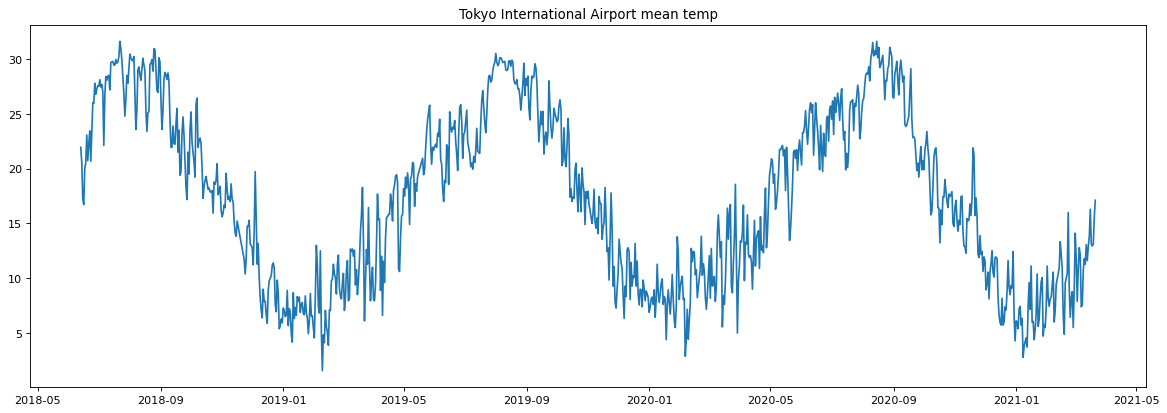

In [21]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tokyo_intl_df['Date'], tokyo_intl_df['Celsius'])
plt.title('Tokyo International Airport mean temp')

#### Tokyo Heliport

In [23]:
tokyo_heliport_df =  df[df['Station']=='TOKYO HELIPORT'] 
tokyo_heliport_df.describe()

,Celsius
count,1000.000000
mean,18.433080
std,7.874053
min,0.780000
25%,11.220000
50%,18.330000
75%,25.220000
max,33.110000


Text(0.5, 1.0, 'Tokyo Heliport mean temp')

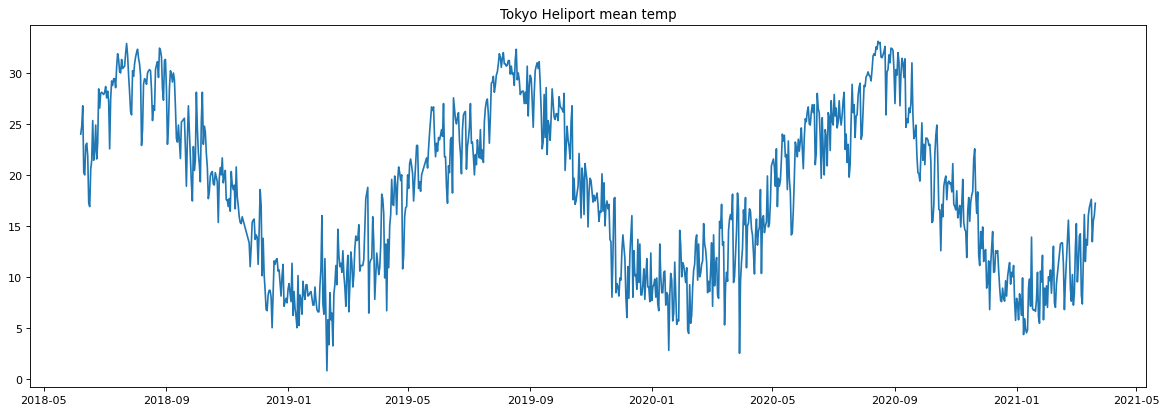

In [22]:
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(tokyo_heliport_df['Date'], tokyo_heliport_df['Celsius'])
plt.title('Tokyo Heliport mean temp')

In [100]:
from sklearn.model_selection import train_test_split
X = tokyo_heliport_df['Date']
y = tokyo_heliport_df['Celsius']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Rolling regression

In [24]:
x = np.arange(0,100)
y = (np.sin(x)+1)*10+2*x+np.random.rand(100)*5

points = 12
names = []
for i in range(points):
  names.append("a"+str(i))
ds = []
target = []
for i in range(points,len(x)-1):
  ds.append(y[i-points:i])
  target.append(y[i]) 
df = pd.DataFrame(np.array(ds),columns=names) 
dfy = df 
dfy["target"] = target

In [73]:
dfy[names]

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11
0,11.237638,22.559601,27.914619,19.660989,13.316192,12.711352,23.748694,34.539411,38.477373,33.943485,26.566236,24.165518
1,22.559601,27.914619,19.660989,13.316192,12.711352,23.748694,34.539411,38.477373,33.943485,26.566236,24.165518,30.092367
2,27.914619,19.660989,13.316192,12.711352,23.748694,34.539411,38.477373,33.943485,26.566236,24.165518,30.092367,44.942197
3,19.660989,13.316192,12.711352,23.748694,34.539411,38.477373,33.943485,26.566236,24.165518,30.092367,44.942197,49.477096
4,13.316192,12.711352,23.748694,34.539411,38.477373,33.943485,26.566236,24.165518,30.092367,44.942197,49.477096,49.297122
...,...,...,...,...,...,...,...,...,...,...,...,...
82,181.519426,190.408750,186.172633,179.102836,177.691839,178.717714,188.914294,196.718310,203.545286,194.881112,189.867733,189.959748
83,190.408750,186.172633,179.102836,177.691839,178.717714,188.914294,196.718310,203.545286,194.881112,189.867733,189.959748,199.324209
84,186.172633,179.102836,177.691839,178.717714,188.914294,196.718310,203.545286,194.881112,189.867733,189.959748,199.324209,209.270720
85,179.102836,177.691839,178.717714,188.914294,196.718310,203.545286,194.881112,189.867733,189.959748,199.324209,209.270720,213.787426


In [76]:
dfy['target'].shape

(87,)

In [78]:
dfy[names].shape

(87, 12)

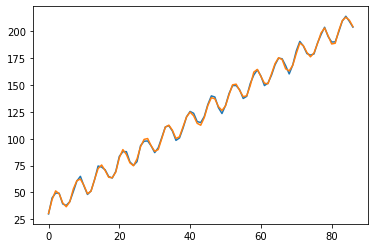

In [77]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(dfy[names],dfy["target"])
plt.plot(np.arange(len(df)),df["target"])
plt.plot(np.arange(len(df)),model.predict(dfy[names]))

In [27]:
last = dfy.iloc[-1]
prediction = []
n = []
for i in range(points-1):
  n.append(last["a"+str(i+1)])
n.append(last["target"])
n.append(model.predict(np.array(n).reshape(1,-1))[0])
prediction.append(n[-1])
for i in range(100):
  n = n[1:]
  n.append(model.predict(np.array(n).reshape(1,-1))[0])
  prediction.append(n[-1])

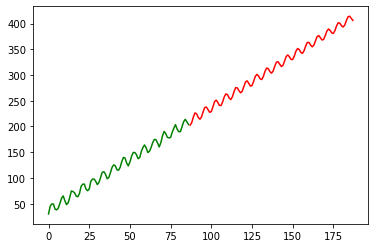

In [28]:
plt.plot(np.arange(len(dfy)),dfy["target"],c="green")
plt.plot(np.arange(len(dfy),len(dfy)+len(prediction)),prediction,c="red")